# 1. Markov Chain

This is Inspired by these videos.
https://www.youtube.com/watch?v=Uz3JIp6EvIg

## 2. Definition

Markov is a mathematical model that describes a system transitioning from one state to another based on probabilistic rules, and the chances of transiting to other variable

# 3. Coding goals

I planned to create a random graph that each line transitions to the other have a probabilistic values from the function *randomize_graph(<number_of_nodes>:int)*, and then have a function called *transitional_matrix(<graph>:dict)* -> np.darray, and from that we create a function that creates the initiate *vector init_vector(<index_of_the_first_choice>: int) *-> np.darray, and finally, we will have the iteration function that will take the initator vector into a certain iteration based on the user inputs, or if there is no input -> it will do it 2 times in the function *markov_chain_iteration(<number_of_iteration>:int)*

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 
import networkx as nx
from IPython.display import display, Math

class Markov_chain:
    def __init__(self, number_of_nodes : int = 2, index_of_the_first_choice : int = 1, iteration_num : int = 2):
        self.number_of_nodes = number_of_nodes
        self.graph = {}
        self.visualize_nx_graph = None
        self.index_of_the_first_choice = index_of_the_first_choice
        self.iteration_num = iteration_num
    
    def randomize_graph(self) -> dict:
        graph = {}
        for i in range(self.number_of_nodes):
            n = 0
            graph[i] = {}
            for j in range(self.number_of_nodes):
                prob = round(random.uniform(0, (1 - n)/2.5), 4)
                if j != self.number_of_nodes - 1:
                    graph[i][j] = prob
                else:
                    graph[i][j] = 1 - n
                n += prob
                
        self.graph = graph
        
        return graph
    
    def visualize_graph(self):
        visualize_graph = nx.DiGraph()
        graph_create = Markov_chain(self.number_of_nodes)
        self.graph = graph_create.randomize_graph()
        for from_node, edges in self.graph.items():
            for to_node, prob in edges.items():
                visualize_graph.add_edge(from_node, to_node, weight = prob)
                
        self.visualize_nx_graph = visualize_graph
        
        position = nx.spring_layout(visualize_graph)
        weight = nx.get_edge_attributes(visualize_graph, "weight")
        nx.draw(visualize_graph, position, with_labels = True, node_color="darkred", font_color="white", node_size = 1000, arrowsize=20)
        nx.draw_networkx_edge_labels(visualize_graph, position, edge_labels={k: f"{v:.2f}" for k, v in weight.items()})
        plt.title("Randomize Markov Chain Graph")
        plt.show()
        
    def transitional_matrix_conversion(self) -> np.ndarray:
        transitional_matrix = []
        for content in self.graph.values():
            transitional_matrix.append([prob for prob in content.values()])
        transitional_matrix = np.array(transitional_matrix)
        self.transitional_matrix = transitional_matrix
        return transitional_matrix
        
    def init_vector(self) -> np.ndarray:
        initiate_vector = [0 for _ in range(self.number_of_nodes)]
        initiate_vector[self.index_of_the_first_choice] = 1
        initiate_vector = np.array(initiate_vector)
        self.initiate_vector = initiate_vector
        return initiate_vector
        
    def markov_chain_iteration(self) -> np.ndarray:
        vector_i = self.initiate_vector
        for _ in range(self.iteration_num):
            vector_i = self.transitional_matrix @ vector_i # type: ignore
        return vector_i # type: ignore
    
    def show_markov_chain_iteration_in_latex(self):
        vector_i = self.initiate_vector  # type: ignore # start vector
        
        for it in range(1, self.iteration_num + 1):
            next_vector = self.transitional_matrix @ vector_i # type: ignore
            
            # Build LaTeX strings
            T_latex = "\\begin{bmatrix}" + " \\\\ ".join(
                [" & ".join([f"{v:.2f}" for v in row]) for row in self.transitional_matrix] # type: ignore
            ) + "\\end{bmatrix}"
            
            v_latex = "\\begin{bmatrix}" + " \\\\ ".join([f"{v:.4f}" for v in vector_i]) + "\\end{bmatrix}" #type: ignore
            result_latex = "\\begin{bmatrix}" + " \\\\ ".join([f"{v:.4f}" for v in next_vector]) + "\\end{bmatrix}"
            
            latex_equation = f"\\text{{Iteration {it}:}}\\quad {T_latex} \\times {v_latex} = {result_latex}"
            
            display(Math(latex_equation))
            
            # Update vector for next iteration
            vector_i = next_vector

    def equilibrium_dataframe(self) -> np.ndarray:
        vector_i = self.initiate_vector
        data_list = [vector_i.copy()]  # start with initial vector
        
        # Perform iterations
        for i in range(1, self.iteration_num + 1):
            vector_i = self.transitional_matrix @ vector_i  # type: ignore
            data_list.append(vector_i.copy())
        
        # Convert list of arrays to proper 2D NumPy array
        dataframe = np.stack(data_list)  # shape: (iterations+1, num_nodes)
        
        # Save for plotting
        self.dataframe = dataframe
        
        # Optional: display as pandas DataFrame
        dataframe_pandas = pd.DataFrame(dataframe, index=range(dataframe.shape[0]))
        display(dataframe_pandas)
        
        return dataframe


    def equilibrium_graph(self):
        if not hasattr(self, "dataframe"):
            raise ValueError("Run equilibrium_dataframe() first to generate data.")
        
        num_iterations, num_nodes = self.dataframe.shape
        
        plt.figure(figsize=(20,5))
        
        for node_idx in range(num_nodes):
            plt.plot(range(num_iterations), self.dataframe[:, node_idx],
                    marker="o", label=f'Node {node_idx}')
        
        plt.xlabel('Iteration')
        plt.ylabel('Probability')
        plt.title('Convergence of Node Probabilities to Equilibrium')
        plt.legend()
        plt.grid(True)
        plt.ylim(0, (1 / self.number_of_nodes)- 0.000001)
        plt.show()



        

{0: {0: 0.1, 1: 0.1179, 2: 0.2329, 3: 0.1318, 4: 0.4174}, 1: {0: 0.1957, 1: 0.3151, 2: 0.0273, 3: 0.1787, 4: 0.2832}, 2: {0: 0.3903, 1: 0.1456, 2: 0.1033, 3: 0.0966, 4: 0.2642}, 3: {0: 0.3808, 1: 0.1624, 2: 0.1117, 3: 0.011, 4: 0.33409999999999995}, 4: {0: 0.156, 1: 0.1563, 2: 0.2476, 3: 0.0896, 4: 0.3504999999999999}}


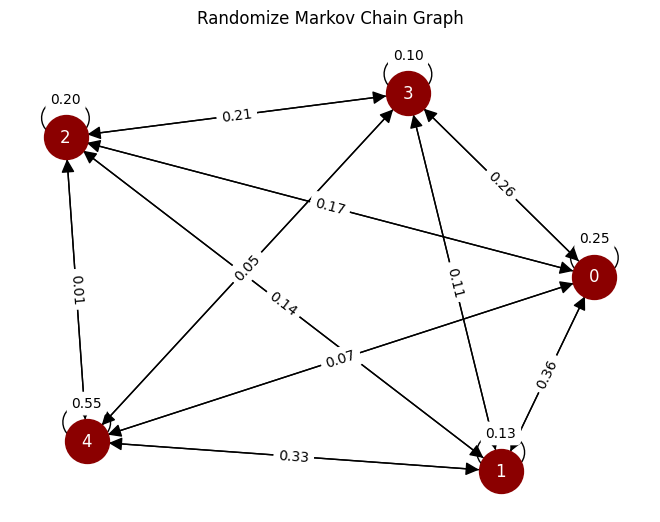

[[0.2531 0.1041 0.1645 0.1401 0.3382]
 [0.3628 0.1342 0.1823 0.0406 0.2801]
 [0.1709 0.1437 0.1993 0.1563 0.3298]
 [0.2585 0.1062 0.2088 0.0959 0.3306]
 [0.068  0.3311 0.0081 0.0455 0.5473]]
[0 0 1 0 0]
[0.12538953 0.13122374 0.12933687 0.12619913 0.08709339]


In [228]:
if __name__ == "__main__":
    markov_chain_example = Markov_chain(number_of_nodes=5, index_of_the_first_choice=2, iteration_num=2)
    graph = markov_chain_example.randomize_graph()
    print(graph)
    markov_chain_example.visualize_graph()
    transitional_matrix = markov_chain_example.transitional_matrix_conversion()
    print(transitional_matrix)
    init_vector = markov_chain_example.init_vector()
    print(init_vector)
    final_markov_chain = markov_chain_example.markov_chain_iteration()
    print(final_markov_chain)
    
    
    

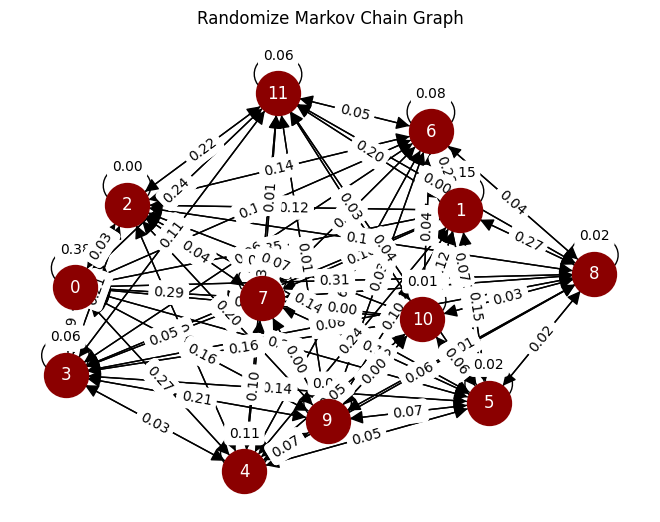

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [229]:
if __name__ == "__main__":
    #this will show on latex
    latex = Markov_chain(number_of_nodes=12, index_of_the_first_choice= 4, iteration_num= 2)
    latex.randomize_graph()
    latex.visualize_graph()
    latex.transitional_matrix_conversion()
    latex.init_vector()
    latex.show_markov_chain_iteration_in_latex()
    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.044800,0.045700,0.190600,0.035300,0.068000,0.070300,0.145600,0.132200,0.210400,0.023300,0.007200,0.022100,0.210400,0.037000,0.105600
2,0.102279,0.080547,0.103617,0.067322,0.069967,0.078140,0.071711,0.076655,0.089778,0.097617,0.092232,0.095602,0.087310,0.086749,0.080785
3,0.087563,0.089695,0.086102,0.085853,0.084380,0.085423,0.081227,0.084368,0.083479,0.092928,0.088664,0.088952,0.082967,0.085350,0.088032
4,0.086833,0.086898,0.086107,0.087034,0.086910,0.087318,0.086297,0.086821,0.086003,0.086608,0.086481,0.086384,0.086543,0.087344,0.087474
5,0.086638,0.086769,0.086657,0.086827,0.086806,0.086787,0.086854,0.086777,0.086771,0.086643,0.086810,0.086714,0.086723,0.086713,0.086742
6,0.086733,0.086714,0.086742,0.086739,0.086751,0.086742,0.086758,0.086746,0.086751,0.086704,0.086723,0.086721,0.086754,0.086743,0.086724
7,0.086734,0.086735,0.086739,0.086733,0.086733,0.086731,0.086737,0.086734,0.086739,0.086737,0.086737,0.086738,0.086736,0.086731,0.086731


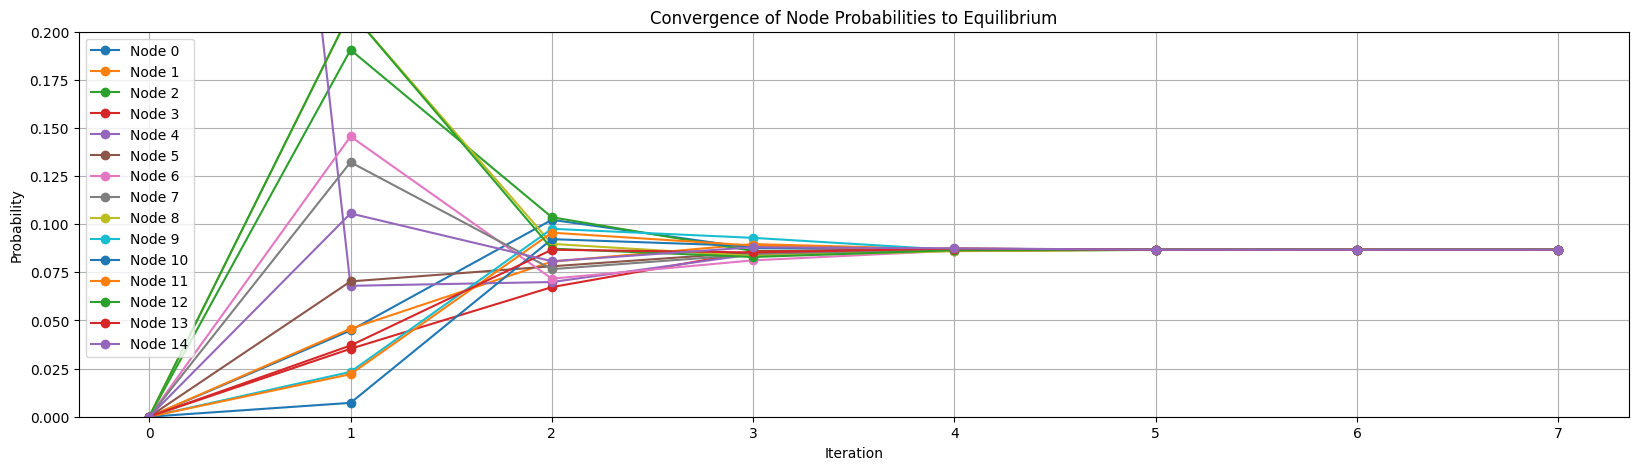

In [230]:
if __name__ == "__main__":
    #this will show on latex
    latex = Markov_chain(number_of_nodes=15, index_of_the_first_choice= 4, iteration_num= 7)
    latex.randomize_graph()
    latex.transitional_matrix_conversion()
    latex.init_vector()
    latex.equilibrium_dataframe()
    latex.equilibrium_graph()

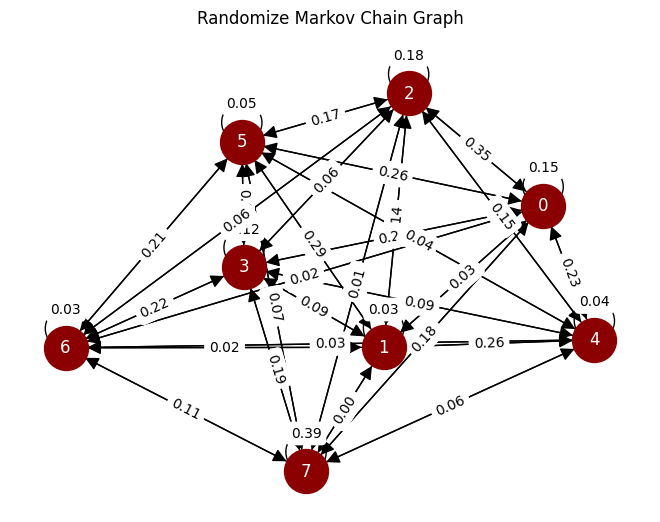

Final vector after iterations:
 [0.17814048 0.1781404  0.17814047 0.17814044 0.17814046 0.17814048
 0.17814037 0.17814039]


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

,0,1,2,3,4,5,6,7
0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.148600,0.025000,0.345400,0.236500,0.227600,0.259200,0.016100,0.182500
2,0.156443,0.211605,0.172360,0.184813,0.164193,0.156193,0.214052,0.177998
3,0.182829,0.177837,0.175429,0.173549,0.180881,0.181570,0.175443,0.176872
4,0.178448,0.177102,0.179076,0.178853,0.178330,0.178607,0.177232,0.177722
5,0.178003,0.178282,0.178193,0.178221,0.178084,0.178055,0.178250,0.178123
6,0.178163,0.178153,0.178123,0.178117,0.178154,0.178155,0.178138,0.178127
7,0.178145,0.178134,0.178146,0.178143,0.178143,0.178145,0.178133,0.178136
8,0.178140,0.178141,0.178141,0.178141,0.178140,0.178140,0.178141,0.178140
9,0.178141,0.178141,0.178140,0.178140,0.178141,0.178141,0.178140,0.178140


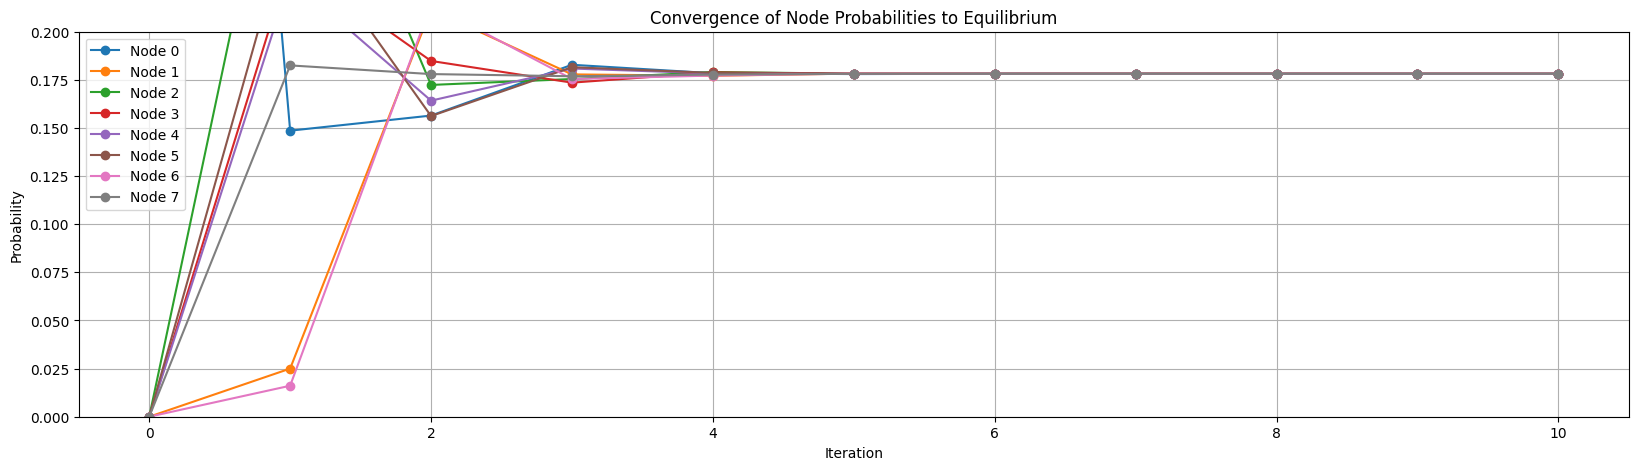

In [ ]:
if __name__ == "__main__":
    # Create a Markov chain with 5 nodes, start at node 0, iterate 10 times
    mc = Markov_chain(number_of_nodes=10, index_of_the_first_choice=0, iteration_num=10)
    
    # Generate a random graph
    mc.randomize_graph()
    
    # Visualize the graph
    mc.visualize_graph()
    
    # Convert to transition matrix
    mc.transitional_matrix_conversion()
    
    # Initialize the starting vector
    mc.init_vector()
    
    # Perform Markov chain iterations and show final vector
    final_vector = mc.markov_chain_iteration()
    print("Final vector after iterations:\n", final_vector)
    
    # Display each iteration in LaTeX (if using Jupyter Notebook)
    mc.show_markov_chain_iteration_in_latex()
    
    # Build equilibrium table/dataframe
    mc.equilibrium_dataframe()
    
    # Plot convergence of each node's probability
    mc.equilibrium_graph()
